In [ ]:
## craft python library install
!pip install craft-text-detector


## pytesseract libraries

!pip install pytesseract
! pip install opencv-python
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension


## easy OCR

!pip install easyocr --user


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt


input_image_name='cacash'
input_image_format='.jpg'

###CACRV.jpeg

#input_image_name='CACashRefund'
#input_image_format='.jpg'

input_image=input_image_name+input_image_format

crop_image_directory=input_image_name+'_crops'



input image


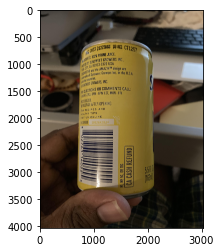

C:\Users\gouth\anaconda3\lib\site-packages\craft_text_detector\craft_utils.py:415: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys = np.array(polys)
C:\Users\gouth\anaconda3\lib\site-packages\craft_text_detector\predict.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polys_as_ratio = np.array(polys_as_ratio)


image with ROI marked on image (image bounding boxes are hard to see plese refer to results directory) 


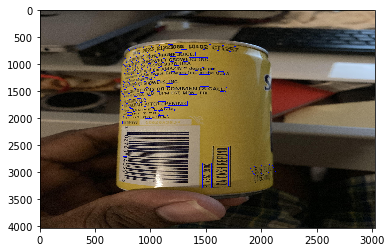

In [2]:
# import craft functions to perfom text identification in the image
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)

# export folder directory
output_dir = '.'

# read image
image = read_image(input_image)

print("input image")
plt.imshow(image)
plt.show()

# load models
refine_net = load_refinenet_model(cuda=True)
craft_net = load_craftnet_model(cuda=True)

# perform prediction
prediction_result = get_prediction(
    image=image,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.7,
    link_threshold=0.4,
    low_text=0.4,
    cuda=True,
    long_size=1280
)

# export detected text regions
exported_file_paths = export_detected_regions(
    image=image,
    regions=prediction_result["boxes"],
    output_dir=output_dir,
    rectify=True
)

print("image with ROI marked on image (image bounding boxes are hard to see plese refer to results directory) ")

detected_image = plt.imread(input_image_name+'_text_detection.png')


plt.imshow(detected_image,interpolation='nearest', aspect='auto')

# export heatmap, detection points, box visualization
export_extra_results(
    image=image,
    regions=prediction_result["boxes"],
    heatmaps=prediction_result["heatmaps"],
    output_dir=output_dir
)



# unload models from gpu
empty_cuda_cache()

In [3]:
from pytesseract import Output
import pytesseract
import cv2
from PIL import Image

filename:--> {} cacash_crops\crop_0.png
filename:--> {} cacash_crops\crop_1.png
filename:--> {} cacash_crops\crop_10.png
filename:--> {} cacash_crops\crop_11.png
filename:--> {} cacash_crops\crop_12.png
filename:--> {} cacash_crops\crop_13.png
filename:--> {} cacash_crops\crop_14.png
filename:--> {} cacash_crops\crop_15.png
filename:--> {} cacash_crops\crop_16.png
    CA CASH REFUND
filename:--> {} cacash_crops\crop_16_rotate.png
filename:--> {} cacash_crops\crop_17.png
filename:--> {} cacash_crops\crop_18.png
filename:--> {} cacash_crops\crop_19.png
filename:--> {} cacash_crops\crop_2.png
filename:--> {} cacash_crops\crop_20.png
filename:--> {} cacash_crops\crop_3.png
filename:--> {} cacash_crops\crop_4.png
filename:--> {} cacash_crops\crop_5.png
filename:--> {} cacash_crops\crop_6.png
filename:--> {} cacash_crops\crop_7.png
filename:--> {} cacash_crops\crop_8.png
filename:--> {} cacash_crops\crop_9.png


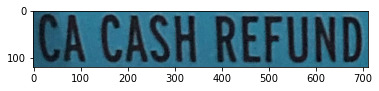

In [4]:
## you need replace this with your local directory in case using windows.. 
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\gouth\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'


from PIL import Image
import glob

import easyocr
import numpy

## use pytesseract to parse the text from the cropped ROI in the actual image.
## As tesseract OCR is efficient only recognizing text that are horizontally aligned 
## we will be using crop image rotation in 90,180,270 to parse texts that are aligned at different angles



for filename in glob.glob(crop_image_directory+'/*.png'): 
    
    print('filename:--> {}',filename)
    
    for i in [90,180,270]:
        im = Image.open(filename)
        im = im.rotate(i, expand=True)
        open_cv_image = numpy.array(im) 
        # Convert RGB to BGR 
        open_cv_image = open_cv_image[:, :, ::-1].copy() 
        #image = cv2.imread(filename)
        rgb = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB)
        results = pytesseract.image_to_data(rgb, output_type=Output.DICT,config = ("-l eng --oem 1 --psm 7"))
        #print(results['conf'],results['text'])
        
        conf_list=results['conf']
        text_out=results['text']
        
        if len([*filter(lambda x: x >= 75, [float(x) for x in conf_list])]) > 0:
            joined_text=' '.join(text_out)
            #print(joined_text)
            if joined_text.upper().strip() in ['CA CASH REFUND','CA CRV']:
                print(joined_text)
                plt.imshow(im)
        
    
    



In [ ]:
### using commercial Easy OCR library which supports auto orientation at various angles
print("Easy OCR")
reader = easyocr.Reader(['en']) 
result = reader.readtext("cacash_crops/crop_16.png",rotation_info=[90, 180 ,270])
print(result)